In [1]:
from tesspy import Tessellation
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point

import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd 

In [2]:
Fortaleza = Tessellation("Fortaleza")
Fortaleza_polygon = Fortaleza.get_polygon()

Text(0.5, 1.0, 'Fortaleza')

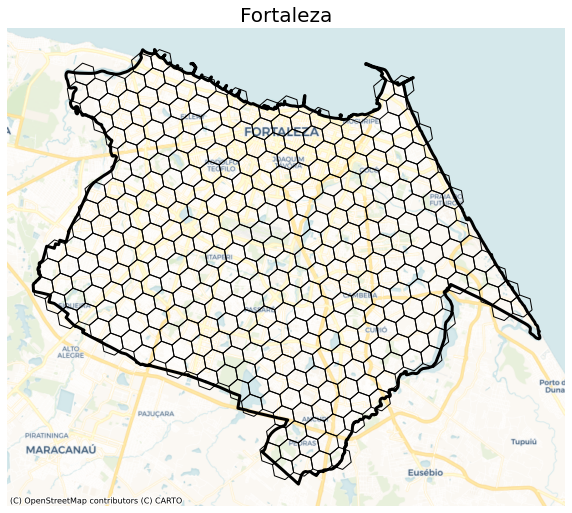

In [3]:
# Fortaleza_hexagons = Fortaleza.hexagons(8)

fig, ax = plt.subplots(figsize=(10,15))

Fortaleza_hexagons.to_crs("EPSG:3857").plot(ax=ax, facecolor="none", edgecolor="k", lw=1)
#contorno
Fortaleza_polygon.to_crs("EPSG:3857").plot(ax=ax, facecolor="none", edgecolor="k", lw=3)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title("Fortaleza", fontsize=20)

In [4]:
Fortaleza_hexagons

,hex_id,geometry
0,8880104f57fffff,"POLYGON ((-38.47135 -3.80381, -38.46733 -3.800..."
1,8880104181fffff,"POLYGON ((-38.47514 -3.86048, -38.47112 -3.857..."
2,8880104511fffff,"POLYGON ((-38.59955 -3.81046, -38.59553 -3.807..."
3,8880104c59fffff,"POLYGON ((-38.51856 -3.77215, -38.51454 -3.768..."
4,8880104503fffff,"POLYGON ((-38.58473 -3.81584, -38.58071 -3.812..."
...,...,...
351,8880104c61fffff,"POLYGON ((-38.47376 -3.76423, -38.46974 -3.760..."
352,88801040b3fffff,"POLYGON ((-38.54338 -3.84054, -38.53936 -3.837..."
353,8880104e21fffff,"POLYGON ((-38.49513 -3.80001, -38.49111 -3.796..."
354,8880104c13fffff,"POLYGON ((-38.52097 -3.73257, -38.51695 -3.729..."


# Dataset

In [5]:
df=pd.read_csv('../DADOS_PROCESSADO/df_lat_lon_francion_v2.csv',sep=';')[['NOME FANTASIA', 'CNAE FISCAL PRINCIPAL',
       'EMDERECO COMPLETO', 'ID', 'LAT', 'LON']]

In [6]:
df

,NOME FANTASIA,CNAE FISCAL PRINCIPAL,EMDERECO COMPLETO,ID,LAT,LON
0,CAROLINA DIAS,6209100,"AVELEDO ,501 - MESSEJANA ,FORTALEZA - CE",8893,-3.836597,-38.496706
1,APF ENGENHARIA,7112000,"DOUTOR JOAQUIM FROTA ,1000 - JOSE DE ALENCAR ,...",7142,-3.801340,-38.469862
2,MIX FRANGO,4729699,"CORONEL VIRGILIO NOGUEIRA ,1018 - GRANJA LISBO...",10877,-3.789604,-38.609068
3,MANEQUINS & CABIDES,4789099,"JOSE AVELINO ,237 - CENTRO ,FORTALEZA - CE",11729,-3.722322,-38.520499
4,VINTAGE,9430800,"VISCONDE DO RIO BRANCO ,1605 - CENTRO ,FORTALE...",8539,-3.734807,-38.524229
...,...,...,...,...,...,...
14491,ALISSON CELL,4752100,"24 DE MAIO ,411 - CENTRO ,FORTALEZA - CE",13577,-3.725351,-38.531078
14492,BIBIQUINES,4781400,"13 DE MAIO ,369 - FATIMA ,FORTALEZA - CE",1344,-3.753314,-38.525016
14493,REI DAS CASES IMPORTS,4752100,"24 DE MAIO ,411 - CENTRO ,FORTALEZA - CE",13625,-3.725351,-38.531078
14494,TT MULTIMARCAS,4511102,"13 DE MAIO ,149 - FATIMA ,FORTALEZA - CE",11938,-3.753901,-38.521927


In [7]:
df.isna().sum()

NOME FANTASIA            0
CNAE FISCAL PRINCIPAL    0
EMDERECO COMPLETO        0
ID                       0
LAT                      0
LON                      0
dtype: int64

In [8]:
df=df.dropna().reset_index(drop=True)
df

,NOME FANTASIA,CNAE FISCAL PRINCIPAL,EMDERECO COMPLETO,ID,LAT,LON
0,CAROLINA DIAS,6209100,"AVELEDO ,501 - MESSEJANA ,FORTALEZA - CE",8893,-3.836597,-38.496706
1,APF ENGENHARIA,7112000,"DOUTOR JOAQUIM FROTA ,1000 - JOSE DE ALENCAR ,...",7142,-3.801340,-38.469862
2,MIX FRANGO,4729699,"CORONEL VIRGILIO NOGUEIRA ,1018 - GRANJA LISBO...",10877,-3.789604,-38.609068
3,MANEQUINS & CABIDES,4789099,"JOSE AVELINO ,237 - CENTRO ,FORTALEZA - CE",11729,-3.722322,-38.520499
4,VINTAGE,9430800,"VISCONDE DO RIO BRANCO ,1605 - CENTRO ,FORTALE...",8539,-3.734807,-38.524229
...,...,...,...,...,...,...
14491,ALISSON CELL,4752100,"24 DE MAIO ,411 - CENTRO ,FORTALEZA - CE",13577,-3.725351,-38.531078
14492,BIBIQUINES,4781400,"13 DE MAIO ,369 - FATIMA ,FORTALEZA - CE",1344,-3.753314,-38.525016
14493,REI DAS CASES IMPORTS,4752100,"24 DE MAIO ,411 - CENTRO ,FORTALEZA - CE",13625,-3.725351,-38.531078
14494,TT MULTIMARCAS,4511102,"13 DE MAIO ,149 - FATIMA ,FORTALEZA - CE",11938,-3.753901,-38.521927


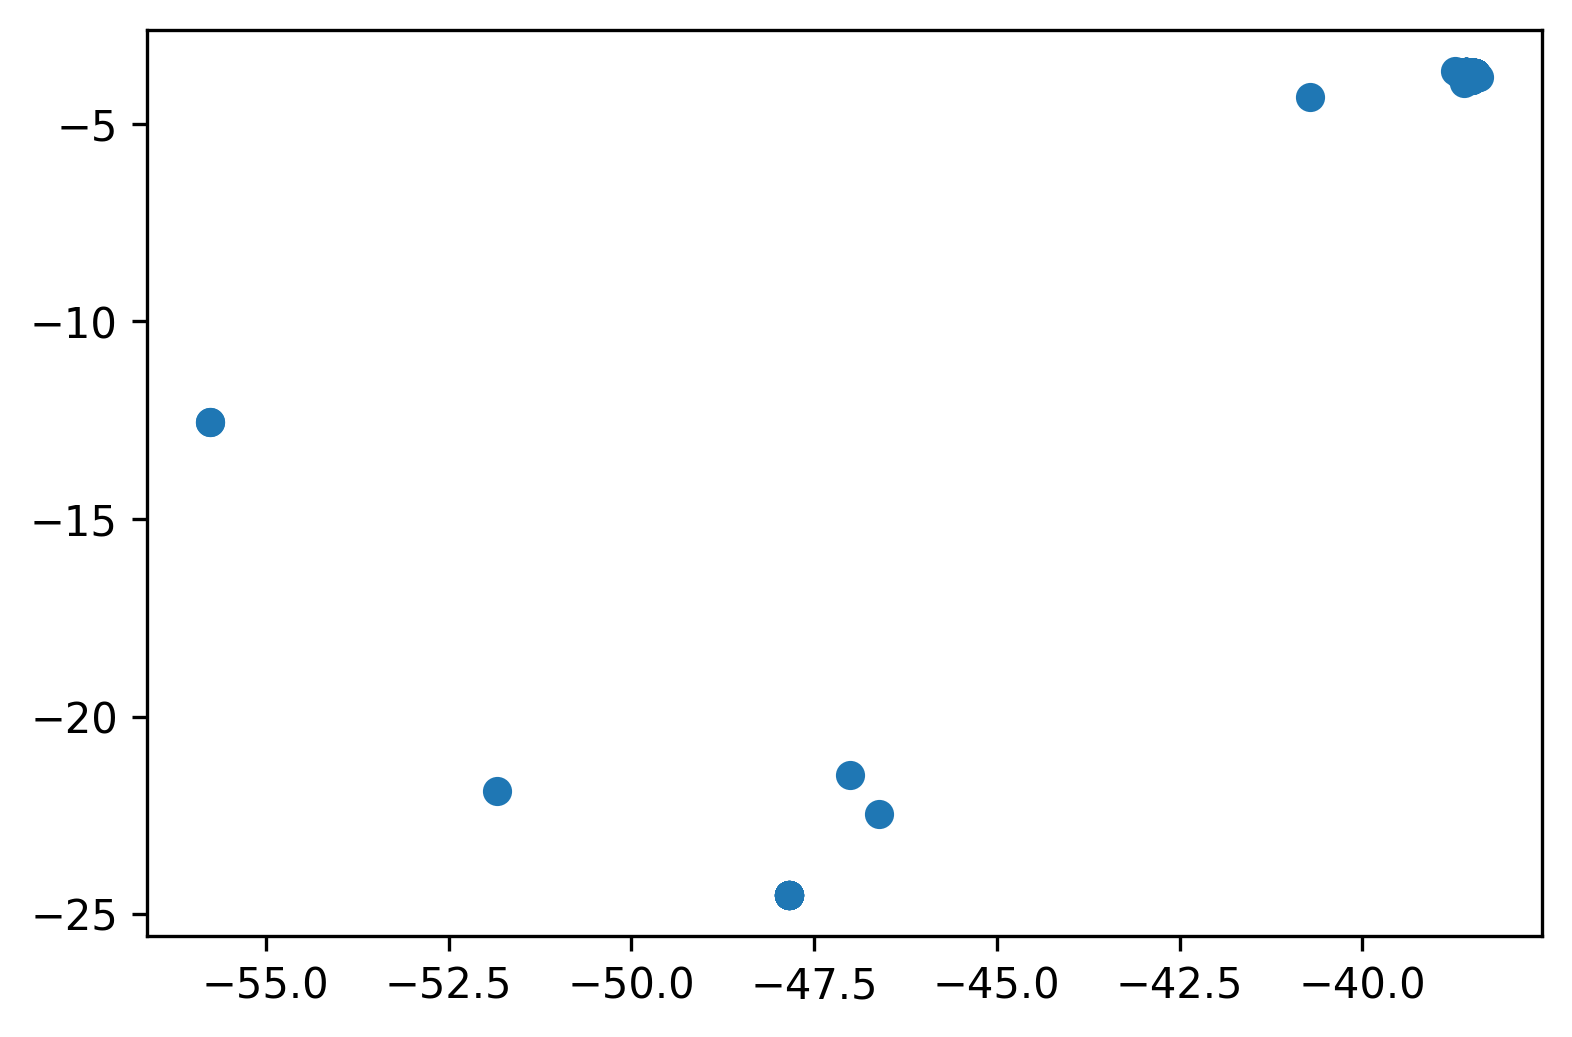

In [9]:
plt.figure(dpi=300)
plt.scatter(df['LON'],df['LAT'])

# Remover outliers

In [10]:
df.describe()

,CNAE FISCAL PRINCIPAL,ID,LAT,LON
count,1.449600e+04,14496.000000,14496.000000,14496.000000
mean,6.312298e+06,8334.752345,-3.783820,-38.536545
std,1.964523e+06,4828.556528,0.703779,0.384825
min,1.091102e+06,0.000000,-24.503425,-55.756176
25%,4.752100e+06,4187.750000,-3.782548,-38.550876
50%,6.209100e+06,8319.500000,-3.745945,-38.515003
75%,8.211300e+06,12535.500000,-3.734413,-38.494608
max,9.602502e+06,16685.000000,-3.666161,-38.410482


In [11]:
df.quantile(q=0.25)

CNAE FISCAL PRINCIPAL    4.752100e+06
ID                       4.187750e+03
LAT                     -3.782548e+00
LON                     -3.855088e+01
Name: 0.25, dtype: float64

In [12]:
df[df['LAT']>df.quantile(q=0.25).LAT]

,NOME FANTASIA,CNAE FISCAL PRINCIPAL,EMDERECO COMPLETO,ID,LAT,LON
3,MANEQUINS & CABIDES,4789099,"JOSE AVELINO ,237 - CENTRO ,FORTALEZA - CE",11729,-3.722322,-38.520499
4,VINTAGE,9430800,"VISCONDE DO RIO BRANCO ,1605 - CENTRO ,FORTALE...",8539,-3.734807,-38.524229
6,BOM D + RESTAURANTE,5611201,"VILEBALDO AGUIAR ,133 - COCO ,FORTALEZA - CE",2627,-3.741484,-38.486406
7,AGAPE,7319002,"ALAN KARDEC ,1132 - MONTESE ,FORTALEZA - CE",9202,-3.766523,-38.548001
8,FAST,4781400,"BEZERRA DE MENEZES ,2450 - SAO GERARDO ,FORTAL...",1262,-3.734935,-38.565987
...,...,...,...,...,...,...
14491,ALISSON CELL,4752100,"24 DE MAIO ,411 - CENTRO ,FORTALEZA - CE",13577,-3.725351,-38.531078
14492,BIBIQUINES,4781400,"13 DE MAIO ,369 - FATIMA ,FORTALEZA - CE",1344,-3.753314,-38.525016
14493,REI DAS CASES IMPORTS,4752100,"24 DE MAIO ,411 - CENTRO ,FORTALEZA - CE",13625,-3.725351,-38.531078
14494,TT MULTIMARCAS,4511102,"13 DE MAIO ,149 - FATIMA ,FORTALEZA - CE",11938,-3.753901,-38.521927


In [13]:
df[df['LON']>df.quantile(q=0.25).LON]

,NOME FANTASIA,CNAE FISCAL PRINCIPAL,EMDERECO COMPLETO,ID,LAT,LON
0,CAROLINA DIAS,6209100,"AVELEDO ,501 - MESSEJANA ,FORTALEZA - CE",8893,-3.836597,-38.496706
1,APF ENGENHARIA,7112000,"DOUTOR JOAQUIM FROTA ,1000 - JOSE DE ALENCAR ,...",7142,-3.801340,-38.469862
3,MANEQUINS & CABIDES,4789099,"JOSE AVELINO ,237 - CENTRO ,FORTALEZA - CE",11729,-3.722322,-38.520499
4,VINTAGE,9430800,"VISCONDE DO RIO BRANCO ,1605 - CENTRO ,FORTALE...",8539,-3.734807,-38.524229
6,BOM D + RESTAURANTE,5611201,"VILEBALDO AGUIAR ,133 - COCO ,FORTALEZA - CE",2627,-3.741484,-38.486406
...,...,...,...,...,...,...
14491,ALISSON CELL,4752100,"24 DE MAIO ,411 - CENTRO ,FORTALEZA - CE",13577,-3.725351,-38.531078
14492,BIBIQUINES,4781400,"13 DE MAIO ,369 - FATIMA ,FORTALEZA - CE",1344,-3.753314,-38.525016
14493,REI DAS CASES IMPORTS,4752100,"24 DE MAIO ,411 - CENTRO ,FORTALEZA - CE",13625,-3.725351,-38.531078
14494,TT MULTIMARCAS,4511102,"13 DE MAIO ,149 - FATIMA ,FORTALEZA - CE",11938,-3.753901,-38.521927


In [14]:
df=df[(df['LON']>df.quantile(q=0.25).LON)|(df['LAT']>df.quantile(q=0.25).LAT)].reset_index(drop=True)
df

,NOME FANTASIA,CNAE FISCAL PRINCIPAL,EMDERECO COMPLETO,ID,LAT,LON
0,CAROLINA DIAS,6209100,"AVELEDO ,501 - MESSEJANA ,FORTALEZA - CE",8893,-3.836597,-38.496706
1,APF ENGENHARIA,7112000,"DOUTOR JOAQUIM FROTA ,1000 - JOSE DE ALENCAR ,...",7142,-3.801340,-38.469862
2,MANEQUINS & CABIDES,4789099,"JOSE AVELINO ,237 - CENTRO ,FORTALEZA - CE",11729,-3.722322,-38.520499
3,VINTAGE,9430800,"VISCONDE DO RIO BRANCO ,1605 - CENTRO ,FORTALE...",8539,-3.734807,-38.524229
4,BOM D + RESTAURANTE,5611201,"VILEBALDO AGUIAR ,133 - COCO ,FORTALEZA - CE",2627,-3.741484,-38.486406
...,...,...,...,...,...,...
13355,ALISSON CELL,4752100,"24 DE MAIO ,411 - CENTRO ,FORTALEZA - CE",13577,-3.725351,-38.531078
13356,BIBIQUINES,4781400,"13 DE MAIO ,369 - FATIMA ,FORTALEZA - CE",1344,-3.753314,-38.525016
13357,REI DAS CASES IMPORTS,4752100,"24 DE MAIO ,411 - CENTRO ,FORTALEZA - CE",13625,-3.725351,-38.531078
13358,TT MULTIMARCAS,4511102,"13 DE MAIO ,149 - FATIMA ,FORTALEZA - CE",11938,-3.753901,-38.521927


In [15]:
df.describe()

,CNAE FISCAL PRINCIPAL,ID,LAT,LON
count,1.336000e+04,13360.000000,13360.000000,13360.000000
mean,6.366625e+06,8317.682260,-3.754941,-38.518307
std,1.938260e+06,4826.858255,0.031760,0.033904
min,1.091102e+06,0.000000,-3.892037,-38.736198
25%,4.755502e+06,4203.750000,-3.769034,-38.539071
50%,6.462000e+06,8274.000000,-3.742924,-38.510297
75%,8.211300e+06,12532.250000,-3.733574,-38.493538
max,9.602502e+06,16685.000000,-3.666161,-38.410482


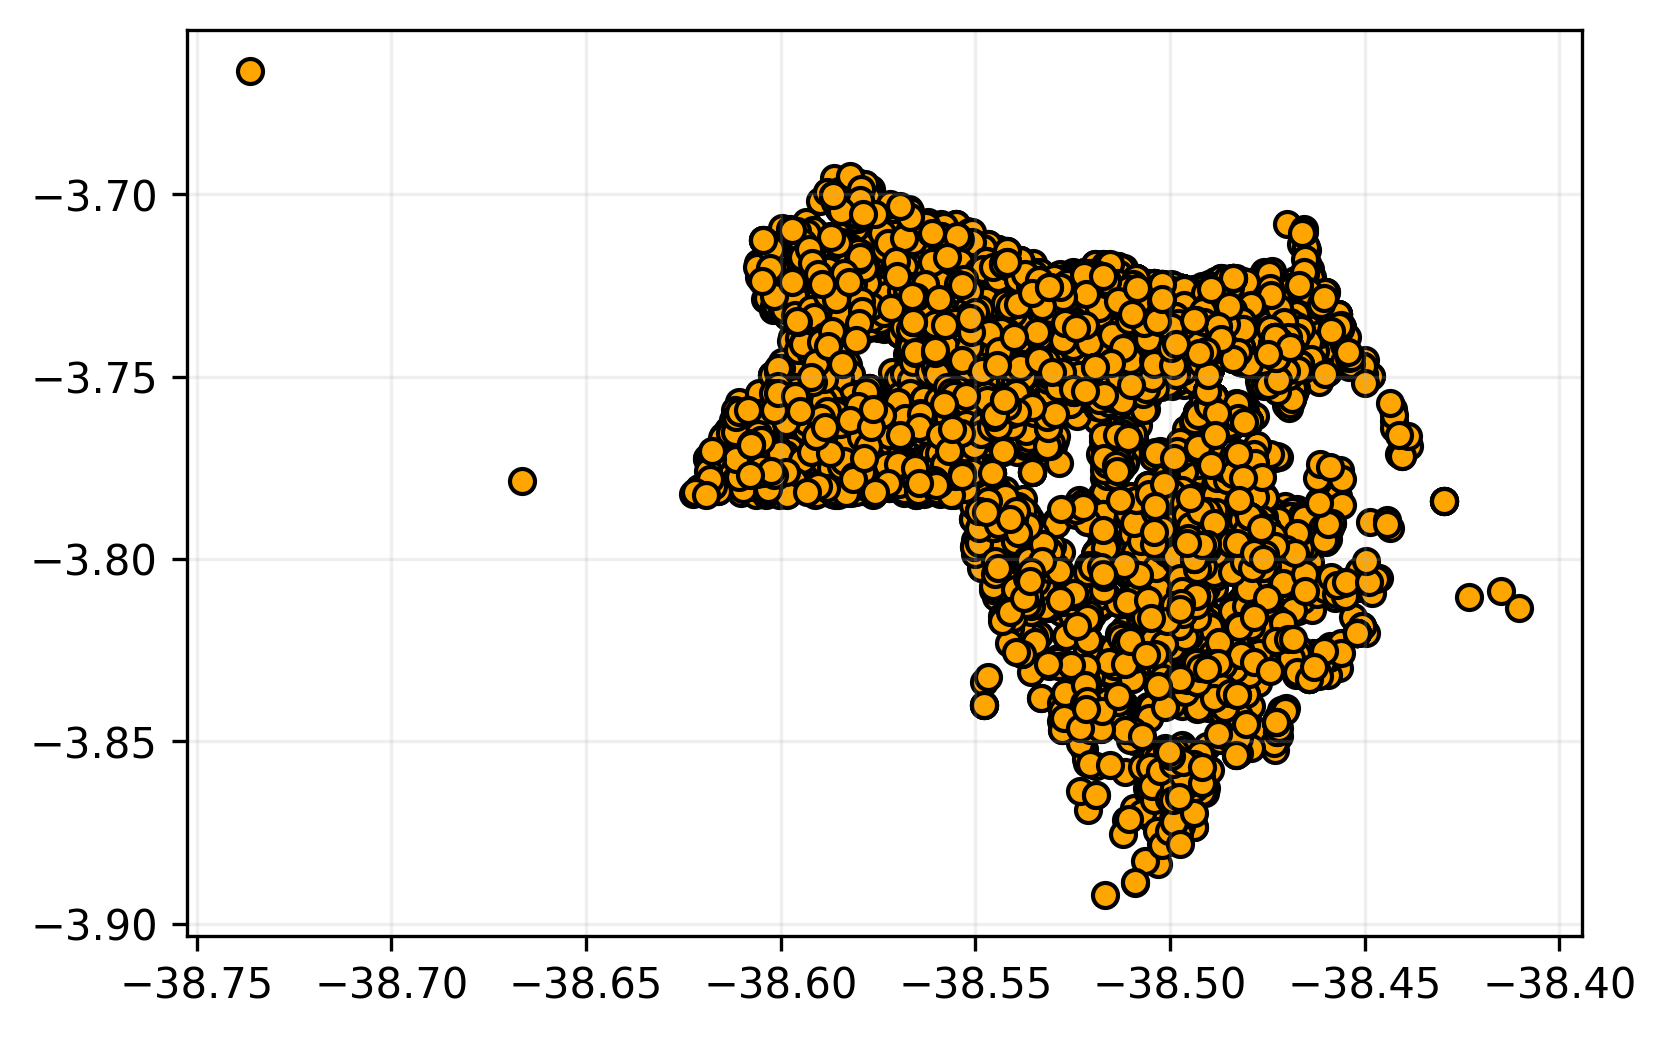

In [16]:
plt.figure(dpi=300)
plt.scatter(df['LON'],df['LAT'],edgecolors='black',color='orange')
plt.grid(alpha=0.2)

# Colocando ponto no Mesh

In [17]:
from shapely.geometry import Point
from tqdm import tqdm 

In [18]:
vetor=np.zeros(len(Fortaleza_hexagons))

In [19]:
for i  in tqdm(range(len(df))):
    longitude=df['LON'].iloc[i]
    latitude=df['LAT'].iloc[i]
    ponto = Point(longitude, latitude) 
    for j in range(len(Fortaleza_hexagons)):
        contido = ponto.within(Fortaleza_hexagons['geometry'].iloc[j])
        vetor[j]=vetor[j]+contido

100%|██████████| 13360/13360 [01:21<00:00, 164.83it/s]


In [20]:
Fortaleza_hexagons['QUANTIDADE']=vetor
Fortaleza_hexagons

,hex_id,geometry,QUANTIDADE
0,8880104f57fffff,"POLYGON ((-38.47135 -3.80381, -38.46733 -3.800...",49.0
1,8880104181fffff,"POLYGON ((-38.47514 -3.86048, -38.47112 -3.857...",1.0
2,8880104511fffff,"POLYGON ((-38.59955 -3.81046, -38.59553 -3.807...",0.0
3,8880104c59fffff,"POLYGON ((-38.51856 -3.77215, -38.51454 -3.768...",8.0
4,8880104503fffff,"POLYGON ((-38.58473 -3.81584, -38.58071 -3.812...",0.0
...,...,...,...
351,8880104c61fffff,"POLYGON ((-38.47376 -3.76423, -38.46974 -3.760...",1.0
352,88801040b3fffff,"POLYGON ((-38.54338 -3.84054, -38.53936 -3.837...",2.0
353,8880104e21fffff,"POLYGON ((-38.49513 -3.80001, -38.49111 -3.796...",172.0
354,8880104c13fffff,"POLYGON ((-38.52097 -3.73257, -38.51695 -3.729...",161.0


In [21]:
Fortaleza_hexagons.sum()

hex_id        8880104f57fffff8880104181fffff8880104511fffff8...
QUANTIDADE                                              13220.0
dtype: object

In [22]:
Fortaleza_hexagons[Fortaleza_hexagons['QUANTIDADE']==0]

,hex_id,geometry,QUANTIDADE
2,8880104511fffff,"POLYGON ((-38.59955 -3.81046, -38.59553 -3.807...",0.0
4,8880104503fffff,"POLYGON ((-38.58473 -3.81584, -38.58071 -3.812...",0.0
8,8880107b1dfffff,"POLYGON ((-38.61297 -3.70881, -38.60895 -3.705...",0.0
20,888010450dfffff,"POLYGON ((-38.57302 -3.82977, -38.56900 -3.826...",0.0
23,8880104535fffff,"POLYGON ((-38.56957 -3.79716, -38.56554 -3.793...",0.0
...,...,...,...
331,888010450bfffff,"POLYGON ((-38.58784 -3.82439, -38.58382 -3.821...",0.0
332,8880104d59fffff,"POLYGON ((-38.45584 -3.76106, -38.45182 -3.757...",0.0
335,8880104543fffff,"POLYGON ((-38.58508 -3.83991, -38.58106 -3.836...",0.0
341,88801045c9fffff,"POLYGON ((-38.62334 -3.80665, -38.61932 -3.803...",0.0


In [23]:
Fortaleza_hexagons=Fortaleza_hexagons[Fortaleza_hexagons['QUANTIDADE']!=0].reset_index(drop=True)
Fortaleza_hexagons

,hex_id,geometry,QUANTIDADE
0,8880104f57fffff,"POLYGON ((-38.47135 -3.80381, -38.46733 -3.800...",49.0
1,8880104181fffff,"POLYGON ((-38.47514 -3.86048, -38.47112 -3.857...",1.0
2,8880104c59fffff,"POLYGON ((-38.51856 -3.77215, -38.51454 -3.768...",8.0
3,8880104dcdfffff,"POLYGON ((-38.46721 -3.72307, -38.46319 -3.719...",6.0
4,88801045e3fffff,"POLYGON ((-38.60506 -3.77942, -38.60104 -3.776...",21.0
...,...,...,...
265,8880104c61fffff,"POLYGON ((-38.47376 -3.76423, -38.46974 -3.760...",1.0
266,88801040b3fffff,"POLYGON ((-38.54338 -3.84054, -38.53936 -3.837...",2.0
267,8880104e21fffff,"POLYGON ((-38.49513 -3.80001, -38.49111 -3.796...",172.0
268,8880104c13fffff,"POLYGON ((-38.52097 -3.73257, -38.51695 -3.729...",161.0


In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [25]:
data=np.log(Fortaleza_hexagons['QUANTIDADE'].values+1)
norm = Normalize(vmin=data.min(), vmax=data.max())
cmap = plt.get_cmap('Blues')
colors = cmap(norm(data))

Text(0.5, 1.0, 'Fortaleza')

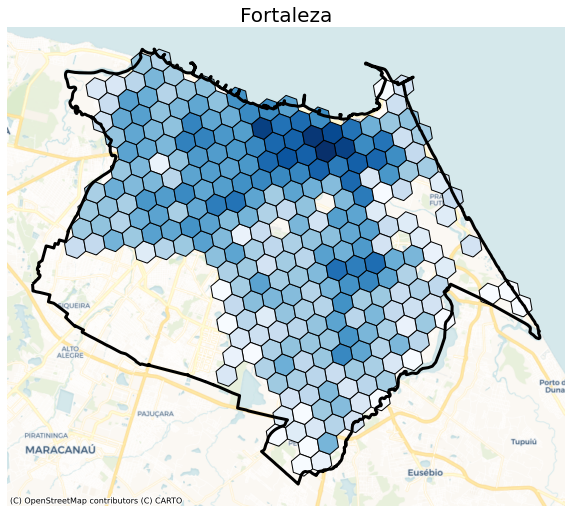

In [26]:
fig, ax = plt.subplots(figsize=(10,15))

Fortaleza_hexagons.to_crs("EPSG:3857").plot(ax=ax, facecolor=colors, edgecolor="k", lw=1)
#contorno
Fortaleza_polygon.to_crs("EPSG:3857").plot(ax=ax, facecolor="none", edgecolor="k", lw=3)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title("Fortaleza", fontsize=20)

# Colocando os Cnais

In [27]:
df['CNAE FISCAL PRINCIPAL'].value_counts()

8211300    834
4781400    724
5611201    638
4120400    581
8630503    465
          ... 
4754701     85
4755502     80
8550301     79
4541206     79
8513900     78
Name: CNAE FISCAL PRINCIPAL, Length: 64, dtype: int64

In [28]:
Fortaleza_hexagons

,hex_id,geometry,QUANTIDADE
0,8880104f57fffff,"POLYGON ((-38.47135 -3.80381, -38.46733 -3.800...",49.0
1,8880104181fffff,"POLYGON ((-38.47514 -3.86048, -38.47112 -3.857...",1.0
2,8880104c59fffff,"POLYGON ((-38.51856 -3.77215, -38.51454 -3.768...",8.0
3,8880104dcdfffff,"POLYGON ((-38.46721 -3.72307, -38.46319 -3.719...",6.0
4,88801045e3fffff,"POLYGON ((-38.60506 -3.77942, -38.60104 -3.776...",21.0
...,...,...,...
265,8880104c61fffff,"POLYGON ((-38.47376 -3.76423, -38.46974 -3.760...",1.0
266,88801040b3fffff,"POLYGON ((-38.54338 -3.84054, -38.53936 -3.837...",2.0
267,8880104e21fffff,"POLYGON ((-38.49513 -3.80001, -38.49111 -3.796...",172.0
268,8880104c13fffff,"POLYGON ((-38.52097 -3.73257, -38.51695 -3.729...",161.0


In [29]:
matriz=np.zeros((len(Fortaleza_hexagons),df['CNAE FISCAL PRINCIPAL'].nunique()))

In [30]:
matriz.shape

(270, 64)

In [31]:
listacnais=list(df['CNAE FISCAL PRINCIPAL'].unique())
listacnais

[6209100,
 7112000,
 4789099,
 9430800,
 5611201,
 7319002,
 4781400,
 8211300,
 7490104,
 6201501,
 4774100,
 6462000,
 9602501,
 4120400,
 4110700,
 8230001,
 4520001,
 8630504,
 6810201,
 8112500,
 4755502,
 4321500,
 7711000,
 4930202,
 1412601,
 6822600,
 8599604,
 4712100,
 5620104,
 7111100,
 4511102,
 4530703,
 5611203,
 6920601,
 1091102,
 9602502,
 4541206,
 8219999,
 4619200,
 8630503,
 4772500,
 4771701,
 9313100,
 7020400,
 4752100,
 6821801,
 7911200,
 4789004,
 4751201,
 4744099,
 8610102,
 4723700,
 6622300,
 8513900,
 9491000,
 8291100,
 9511800,
 8550301,
 6204000,
 8650003,
 8650004,
 4729699,
 4754701,
 7319003]

In [32]:
listacnais.index(6920601)

33

In [33]:
matriz[0,0]

0.0

In [34]:
for i  in tqdm(range(len(df))):
    longitude=df['LON'].iloc[i]
    latitude=df['LAT'].iloc[i]
    ponto = Point(longitude, latitude) 
    for j in range(len(Fortaleza_hexagons)):
        contido = ponto.within(Fortaleza_hexagons['geometry'].iloc[j])
        k=listacnais.index(df['CNAE FISCAL PRINCIPAL'].iloc[i])
        if contido==True:
            matriz[j,k]=matriz[j,k]+1
            break



100%|██████████| 13360/13360 [00:49<00:00, 271.41it/s]


In [35]:
dfcnai=pd.DataFrame(matriz,columns=listacnais)
dfcnai

,6209100,7112000,4789099,9430800,5611201,7319002,4781400,8211300,7490104,6201501,...,9491000,8291100,9511800,8550301,6204000,8650003,8650004,4729699,4754701,7319003
0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,0.0,5.0,1.0,1.0,9.0,5.0,2.0,21.0,2.0,4.0,...,1.0,2.0,0.0,0.0,1.0,4.0,3.0,3.0,0.0,2.0
268,3.0,1.0,4.0,7.0,3.0,0.0,35.0,15.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0


In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
matrizdistancia=cosine_similarity(dfcnai.values)

In [41]:
pd.DataFrame(matrizdistancia)

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,1.000000,0.379663,0.201347,0.067116,0.234061,0.375740,0.199323,0.368245,0.240120,0.283306,...,0.402137,0.299944,0.000000,0.249665,0.636721,0.094916,0.268462,0.701259,0.391028,0.131625
1,0.379663,1.000000,0.000000,0.000000,0.164399,0.175384,0.000000,0.182574,0.158114,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.449215,0.000000,0.707107,0.581096,0.343311,0.000000
2,0.201347,0.000000,1.000000,0.375000,0.464991,0.327755,0.601041,0.371161,0.279508,0.000000,...,0.367912,0.372423,0.000000,0.232495,0.307055,0.000000,0.250000,0.234798,0.121379,0.392232
3,0.067116,0.000000,0.375000,1.000000,0.406867,0.301180,0.601041,0.322749,0.167705,0.150756,...,0.183956,0.041380,0.000000,0.406867,0.158821,0.000000,0.250000,0.097833,0.218482,0.686406
4,0.234061,0.164399,0.464991,0.406867,1.000000,0.354234,0.706916,0.270135,0.155963,0.105150,...,0.342151,0.211656,0.000000,0.405405,0.388946,0.000000,0.232495,0.300242,0.240811,0.455961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.094916,0.000000,0.000000,0.000000,0.000000,0.025055,0.100000,0.000000,0.316228,0.000000,...,0.222988,0.117041,0.000000,0.164399,0.029948,1.000000,0.000000,0.027671,0.022887,0.000000
266,0.268462,0.707107,0.250000,0.250000,0.232495,0.478345,0.212132,0.548673,0.223607,0.000000,...,0.262794,0.082761,0.000000,0.116248,0.508228,0.000000,1.000000,0.586995,0.291309,0.000000
267,0.701259,0.581096,0.234798,0.097833,0.300242,0.542853,0.226904,0.593616,0.258137,0.294976,...,0.468947,0.204036,0.055342,0.122826,0.792226,0.027671,0.586995,1.000000,0.514892,0.038373
268,0.391028,0.343311,0.121379,0.218482,0.240811,0.654297,0.228874,0.489947,0.180941,0.165907,...,0.372565,0.192872,0.000000,0.312302,0.579869,0.022887,0.291309,0.514892,1.000000,0.177739


Text(0, 0.5, 'f(d)')

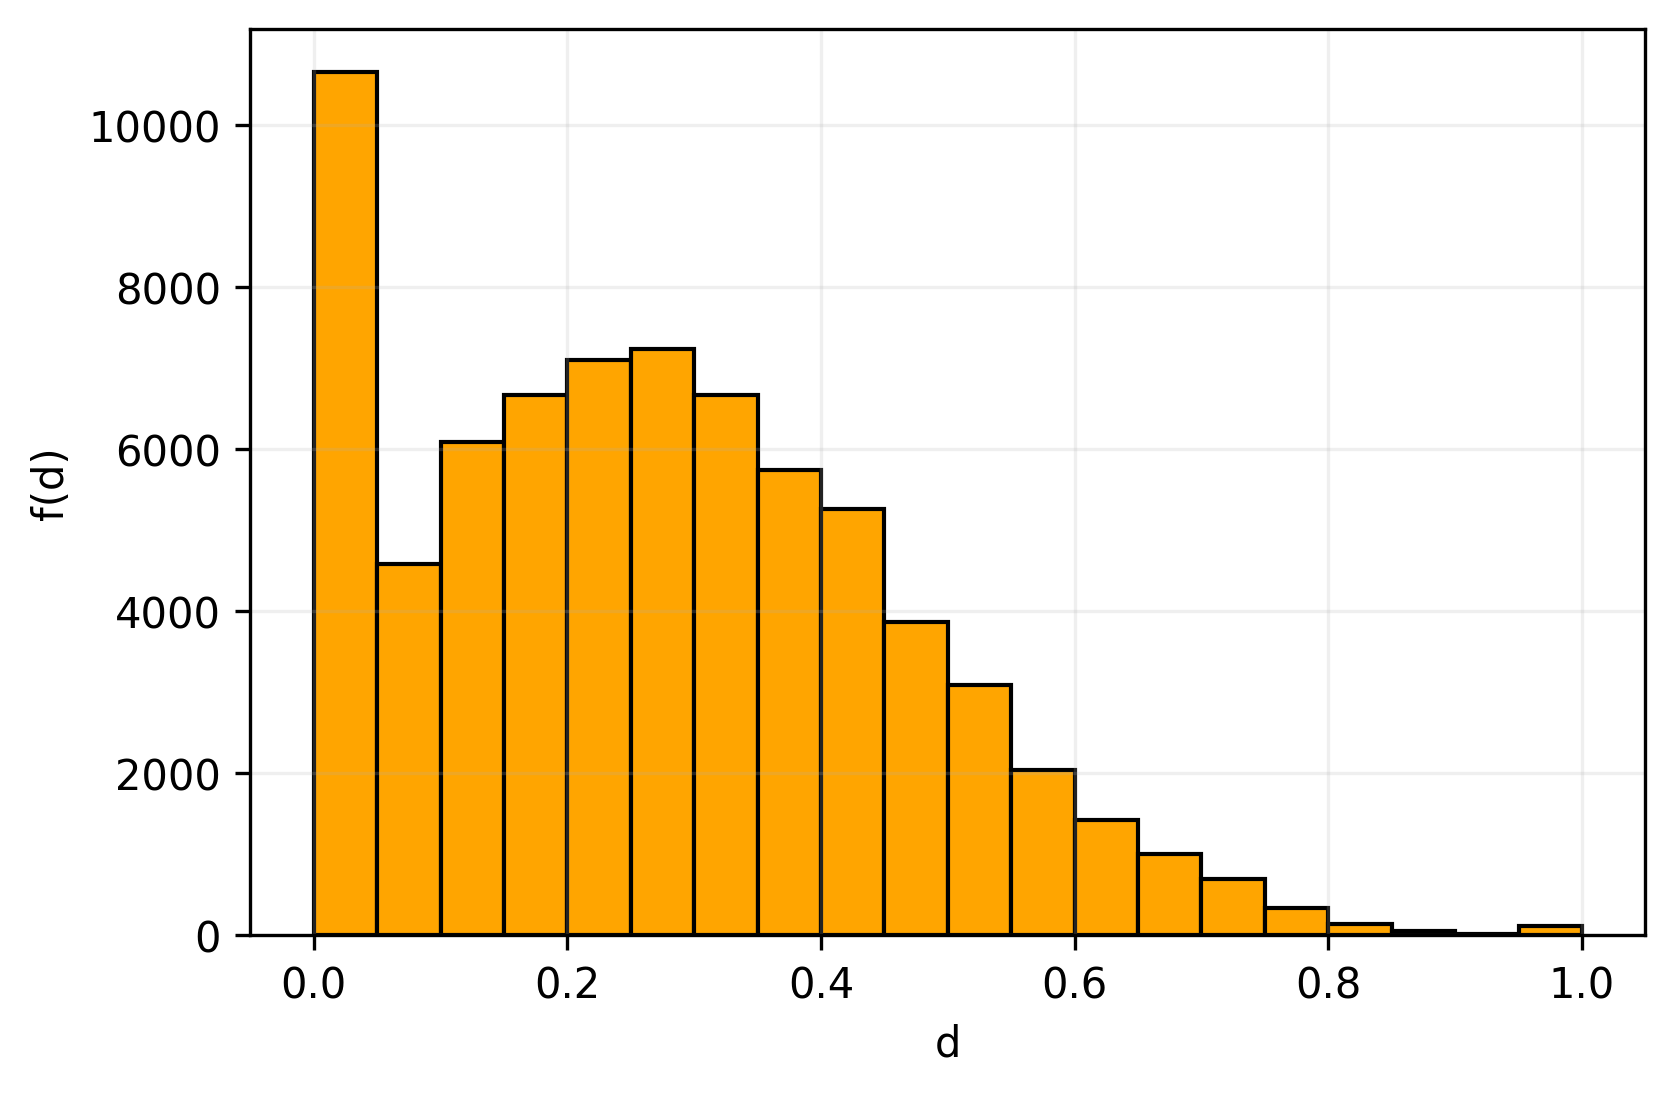

In [44]:
plt.figure(dpi=300)
m=matrizdistancia.flatten().copy()
plt.hist(m[m<1],edgecolor='black',color='orange',bins=20)
plt.grid(alpha=0.2)
plt.xlabel('d')
plt.ylabel('f(d)')

Text(0, 0.5, 'f(d)')

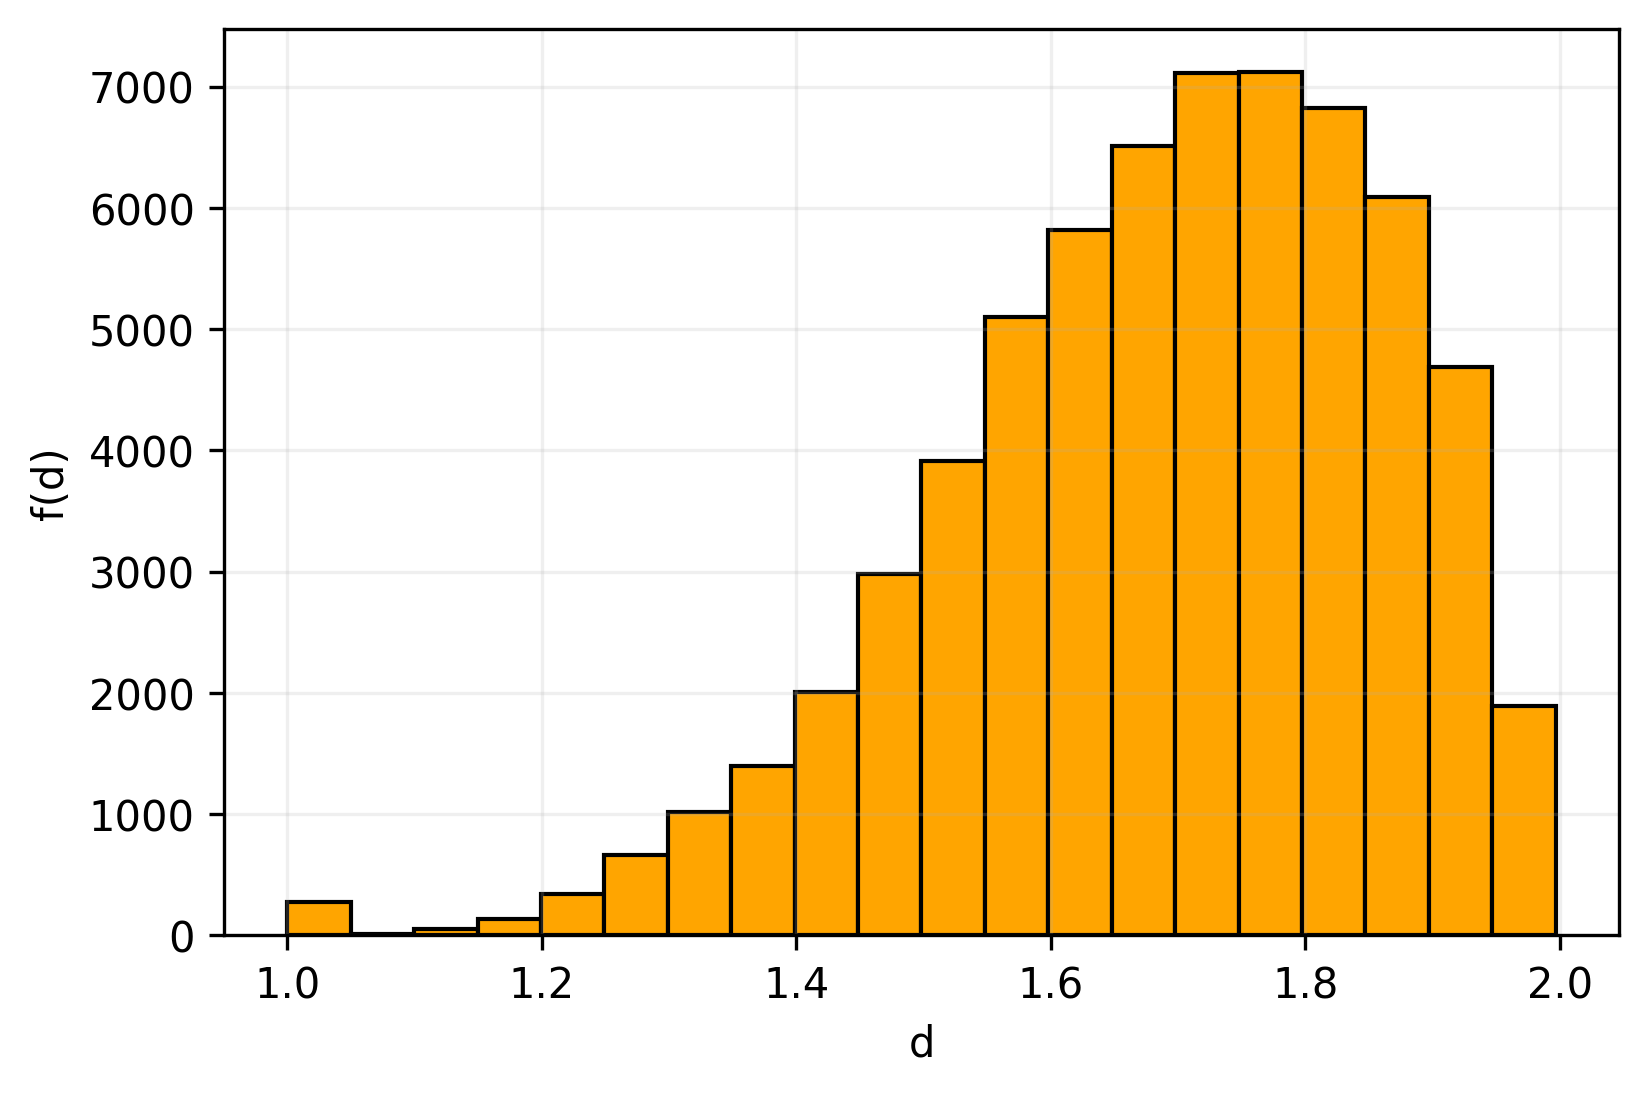

In [63]:
plt.figure(dpi=300)
m=2-matrizdistancia.flatten().copy()
plt.hist(m[m<2],edgecolor='black',color='orange',bins=20)
plt.grid(alpha=0.2)
plt.xlabel('d')
plt.ylabel('f(d)')

In [45]:
from sklearn.manifold import TSNE

In [54]:


X = list(dfcnai.values)
X_embedded = TSNE(n_components=2, perplexity=10.0,n_iter=20000).fit_transform(X)

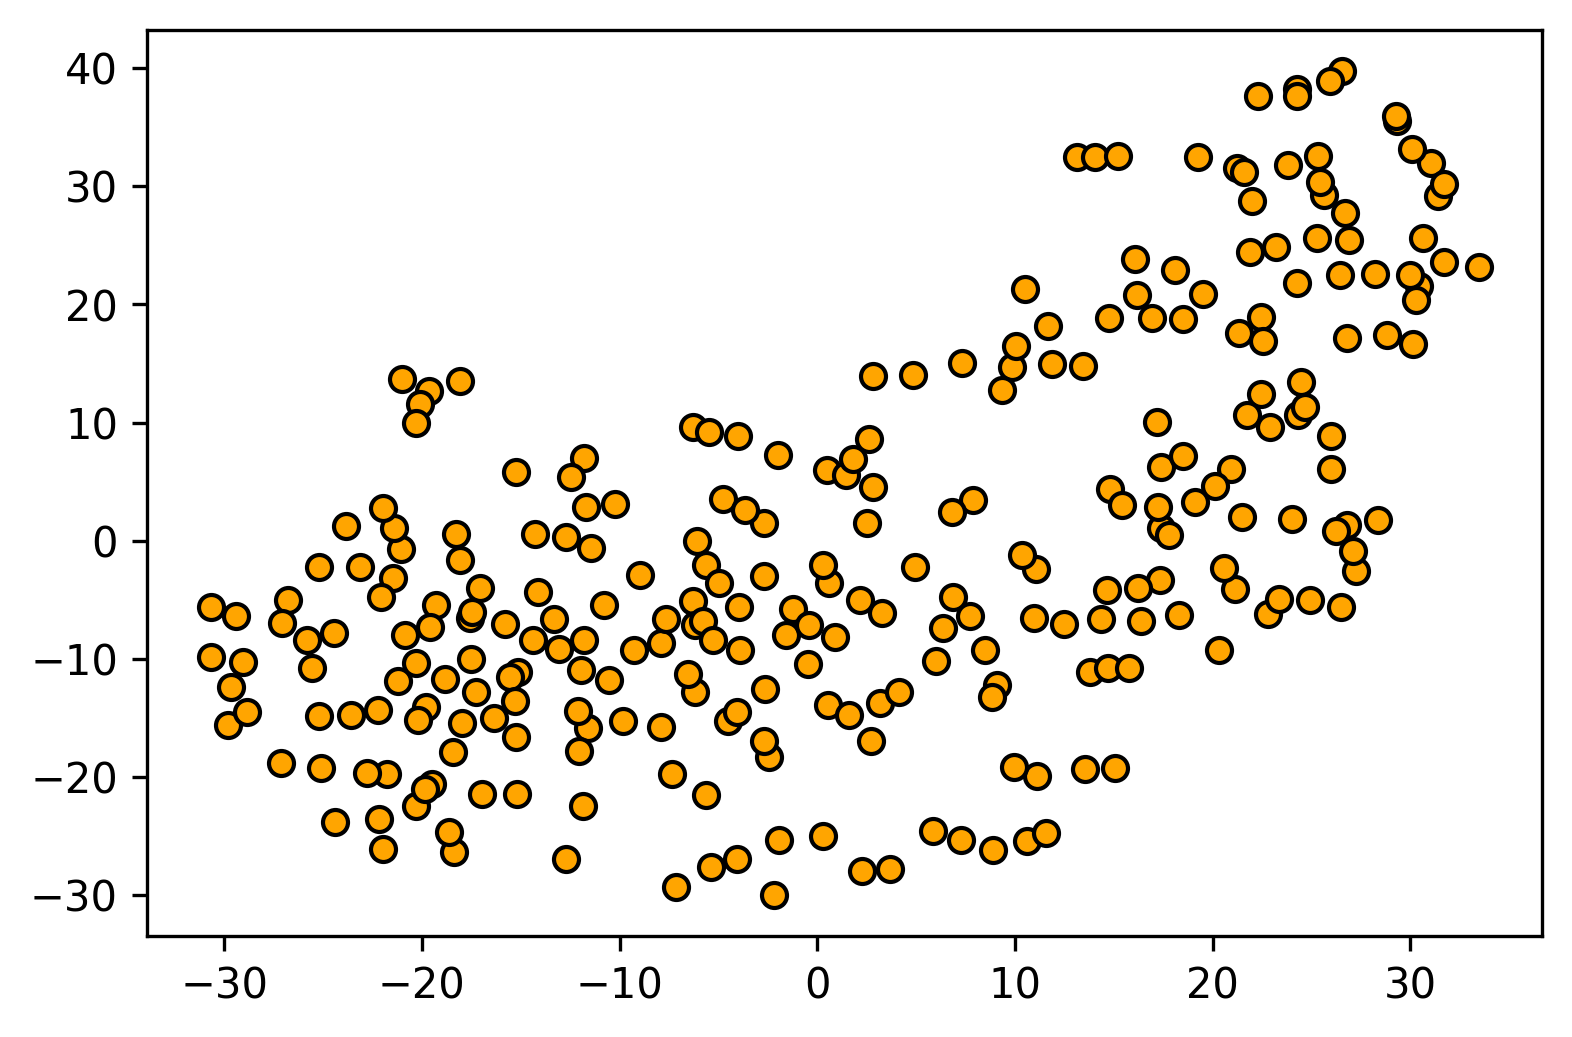

In [55]:
plt.figure(dpi=300)
plt.scatter(X_embedded[:,0],X_embedded[:,1],edgecolors='black',color='orange')

In [87]:
from sklearn.cluster import DBSCAN
import numpy as np
X = 2-matrizdistancia
clustering = DBSCAN(eps=1.3, min_samples=2,metric='precomputed').fit(X)
clustering.labels_
print(clustering.labels_.max()+1)
print(len(clustering.labels_[clustering.labels_==-1])/len(clustering.labels_))

11
0.4


In [88]:
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0, -1,
        1,  0, -1,  2, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  3,
       -1, -1,  0,  0,  0,  0,  4, -1, -1, -1,  0,  0,  0, -1,  0,  0, -1,
       -1,  0,  5, -1, -1,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  6, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0,
        7,  0, -1,  2,  8,  0,  0,  0,  9,  9,  0, -1,  0,  0, -1, -1,  0,
        0,  7,  0,  0,  0,  0,  8,  0,  0, -1,  0,  7,  0,  0, -1, -1, -1,
       -1,  0,  0,  0, -1, -1,  3, -1, -1,  0,  0,  0, 10,  0, -1, -1,  8,
       -1,  0,  8,  0,  0, -1,  0,  0,  7, -1, -1, -1, -1, -1,  0,  0,  8,
        0, -1, -1, -1,  0, -1, -1,  0,  0, -1, -1, -1,  0, -1, -1,  0,  0,
        0,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1,  6,  0,  0,  0, -1, -1,
       -1, -1, -1,  1, -1, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  4, -1,  0,  0,  0,
        0, -1, -1, -1,  0

In [89]:
Fortaleza_hexagons['CLUSTER']=clustering.labels_
Fortaleza_hexagons

,hex_id,geometry,QUANTIDADE,CLUSTER
0,8880104f57fffff,"POLYGON ((-38.47135 -3.80381, -38.46733 -3.800...",49.0,0
1,8880104181fffff,"POLYGON ((-38.47514 -3.86048, -38.47112 -3.857...",1.0,0
2,8880104c59fffff,"POLYGON ((-38.51856 -3.77215, -38.51454 -3.768...",8.0,0
3,8880104dcdfffff,"POLYGON ((-38.46721 -3.72307, -38.46319 -3.719...",6.0,0
4,88801045e3fffff,"POLYGON ((-38.60506 -3.77942, -38.60104 -3.776...",21.0,0
...,...,...,...,...
265,8880104c61fffff,"POLYGON ((-38.47376 -3.76423, -38.46974 -3.760...",1.0,10
266,88801040b3fffff,"POLYGON ((-38.54338 -3.84054, -38.53936 -3.837...",2.0,0
267,8880104e21fffff,"POLYGON ((-38.49513 -3.80001, -38.49111 -3.796...",172.0,0
268,8880104c13fffff,"POLYGON ((-38.52097 -3.73257, -38.51695 -3.729...",161.0,0


In [90]:
Fortaleza_hexagons.CLUSTER.value_counts()

 0     135
-1     108
 8       6
 7       5
 1       2
 2       2
 3       2
 4       2
 5       2
 6       2
 9       2
 10      2
Name: CLUSTER, dtype: int64

In [92]:
dfcnai

,6209100,7112000,4789099,9430800,5611201,7319002,4781400,8211300,7490104,6201501,...,9491000,8291100,9511800,8550301,6204000,8650003,8650004,4729699,4754701,7319003
0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,0.0,5.0,1.0,1.0,9.0,5.0,2.0,21.0,2.0,4.0,...,1.0,2.0,0.0,0.0,1.0,4.0,3.0,3.0,0.0,2.0
268,3.0,1.0,4.0,7.0,3.0,0.0,35.0,15.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0


In [95]:
dfcnai.mean()

6209100    0.807407
7112000    1.281481
4789099    0.566667
9430800    0.662963
5611201    2.311111
             ...   
8650003    0.537037
8650004    0.340741
4729699    0.607407
4754701    0.311111
7319003    0.396296
Length: 64, dtype: float64

In [96]:
dfcnai.std()

6209100    2.611090
7112000    3.281472
4789099    1.550033
9430800    1.288106
5611201    4.158508
             ...   
8650003    1.905899
8650004    0.855013
4729699    1.131478
4754701    0.644873
7319003    1.060610
Length: 64, dtype: float64

# Conta

$zscore=\frac{x-\mu}{\sigma}$


In [174]:
zonaescolha=np.random.randint(0,len(dfcnai))
zonaescolha

10

In [175]:
type(Fortaleza_hexagons)

geopandas.geodataframe.GeoDataFrame

Text(0.5, 1.0, 'Fortaleza')

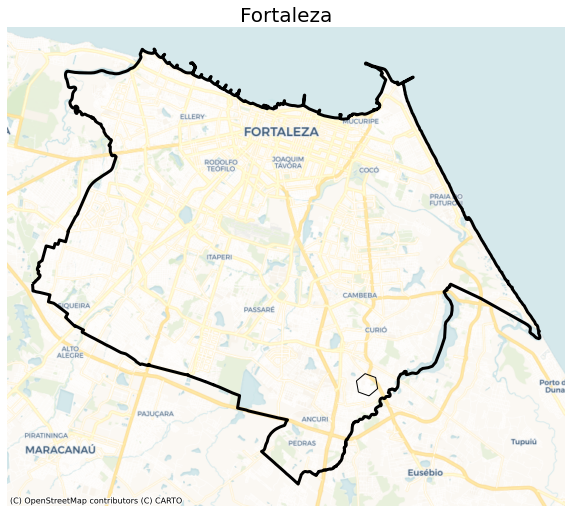

In [176]:
fig, ax = plt.subplots(figsize=(10,15))

Fortaleza_hexagons[zonaescolha:zonaescolha+1].to_crs("EPSG:3857").plot(ax=ax, facecolor='none', edgecolor="k", lw=1)
#contorno
Fortaleza_polygon.to_crs("EPSG:3857").plot(ax=ax, facecolor="none", edgecolor="k", lw=3)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title("Fortaleza", fontsize=20)

In [177]:
x=dfcnai.iloc[zonaescolha].values
x

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 2., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [178]:
media=dfcnai.mean().values
std=dfcnai.std()

In [179]:
resultado=(x-media)/std

In [180]:
daux=pd.DataFrame(resultado).rename(columns={0:'Z'}).sort_values('Z')
daux

,Z
4712100,-0.891167
9491000,-0.616187
1412601,-0.608783
4520001,-0.600598
4530703,-0.580595
...,...
7319002,0.189693
9313100,0.355455
4771701,0.951337
8513900,1.154955


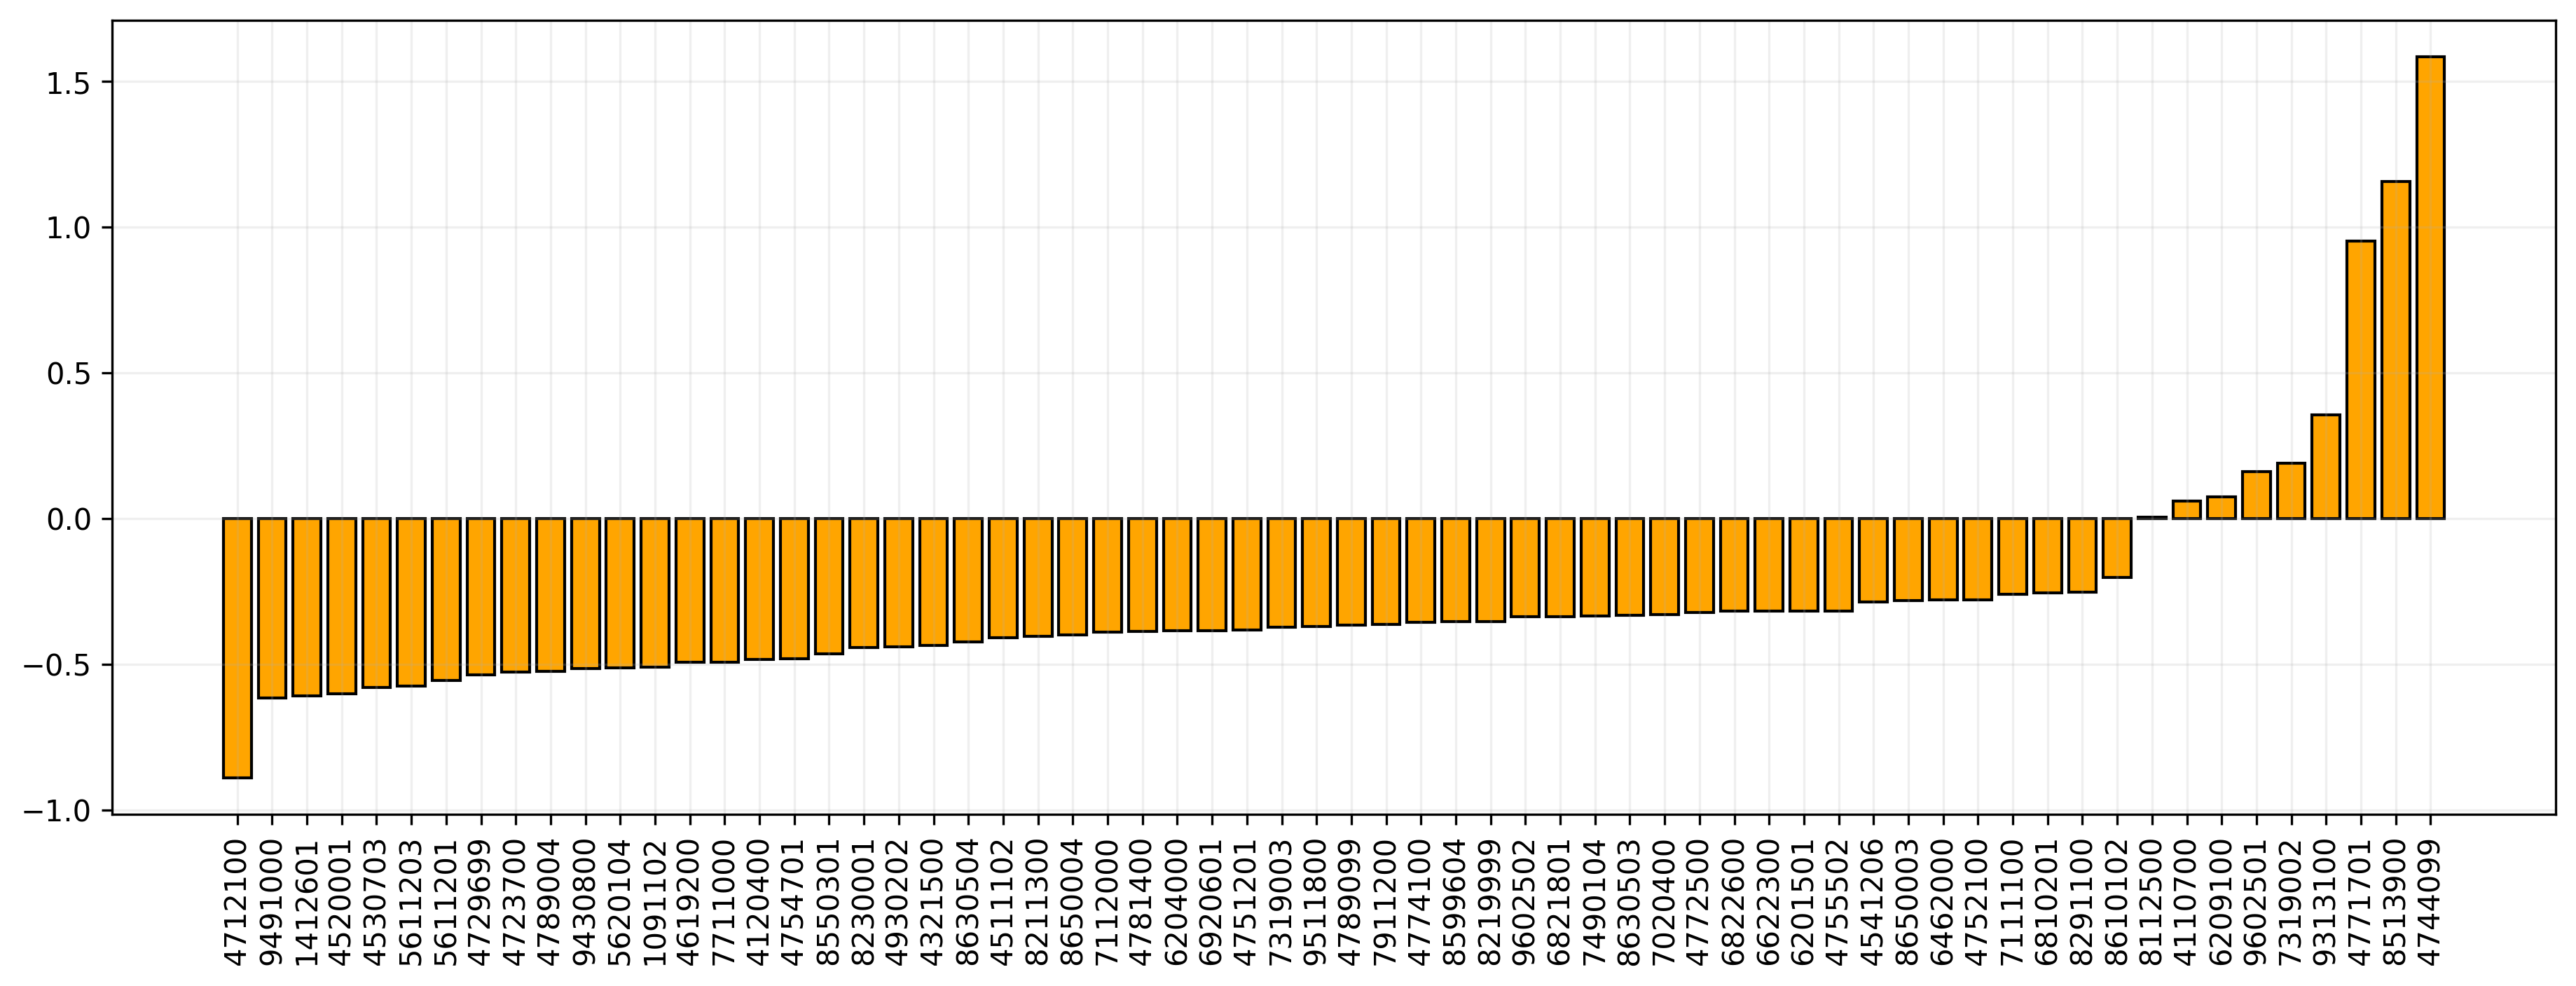

In [181]:
plt.figure(dpi=300,figsize=(15,5))

plt.bar([str(r) for r in daux.index],daux.Z.values,edgecolor='black',color='orange')
plt.xticks(rotation=90)
plt.grid(alpha=0.2)

In [182]:
daux

,Z
4712100,-0.891167
9491000,-0.616187
1412601,-0.608783
4520001,-0.600598
4530703,-0.580595
...,...
7319002,0.189693
9313100,0.355455
4771701,0.951337
8513900,1.154955


In [183]:
df[df['CNAE FISCAL PRINCIPAL']==daux.index[0]]

,NOME FANTASIA,CNAE FISCAL PRINCIPAL,EMDERECO COMPLETO,ID,LAT,LON
45,RESTAURANTE NOSSA SENHORA APARECIDA,4712100,"BARAO DO RIO BRANCO ,1865 - FATIMA ,FORTALEZA ...",3779,-3.745323,-38.534193
59,MUNDO VERDE PRODUTOS NATURAIS,4712100,"GENERAL CLARINDO DE QUEIROZ ,641 - CENTRO ,FOR...",3424,-3.732998,-38.529993
103,MERCEARIA OSSIAM,4712100,"MAJOR VERISSIMO ,320 - ELLERY ,FORTALEZA - CE",3794,-3.722185,-38.562772
110,MERCADINHO JA,4712100,"MOURA MATOS ,1717 - PARQUE DOIS IRMAOS ,FORTAL...",3436,-3.810284,-38.544674
134,FLAJAN DISTRIBUIDORA,4712100,"PAPI JUNIOR ,2316 - BELA VISTA ,FORTALEZA - CE",3361,-3.754520,-38.560007
...,...,...,...,...,...,...
13232,MERCADINHO ROCHA,4712100,"PADRE PERDIGAO SAMPAIO ,387 - QUINTINO CUNHA ,...",3874,-3.734677,-38.595813
13246,BARATAO DOS LARES,4712100,"ALBERTO MONTEZUMA ,180 - PARREAO ,FORTALEZA - CE",3692,-3.761071,-38.531676
13296,MERCEARIA NOSSA SENHORA AUXILIADORA,4712100,"AMARAL ,25 - DAMAS ,FORTALEZA - CE",3733,-3.748485,-38.548400
13310,B & G COMERCIO SERVICOS E REPRESENTACOES,4712100,"BEATRIZ (BARROSO) ,40 - BARROSO ,FORTALEZA - CE",3419,-3.816119,-38.504973


In [184]:
df[df['CNAE FISCAL PRINCIPAL']==daux.index[1]]

,NOME FANTASIA,CNAE FISCAL PRINCIPAL,EMDERECO COMPLETO,ID,LAT,LON
150,COMUNIDADE CRISTA SILOE,9491000,"MANOEL MONTEIRO ,770 - CIDADE DOS FUNCIONARIOS...",10444,-3.793551,-38.494505
286,IEADICE,9491000,"ROSINHA SAMPAIO ,1255 - JARDIM GUANABARA ,FORT...",10404,-3.726587,-38.590038
472,RESPLENDOR DE CRISTO,9491000,"JOAO CORDEIRO ,2676 - JOAQUIM TAVORA ,FORTALEZ...",10406,-3.743708,-38.519239
559,CONADENEC,9491000,"IPIRANGA ,2392 - QUINTINO CUNHA ,FORTALEZA - CE",10400,-3.730589,-38.597814
683,IVV,9491000,"PADRE GUERRA ,1437 - PARQUELANDIA ,FORTALEZA - CE",10489,-3.739059,-38.557362
...,...,...,...,...,...,...
12615,IPTC,9491000,"CARDEAL ARCOVERDE ,25 - AUTRAN NUNES ,FORTALEZ...",10421,-3.750085,-38.592231
13105,IGREJA PRESBITERIANA DO BRASIL EM JARDIM AMERICA,9491000,"JULIO CESAR ,593 - JARDIM AMERICA ,FORTALEZA - CE",10396,-3.747592,-38.540605
13299,IGREJA PENTECOSTAL MINISTERIO DA RENOVACAO,9491000,"MIQUELANDIA ,127 - AUTRAN NUNES ,FORTALEZA - CE",10403,-3.759310,-38.594950
13336,IGREJA BIBLICA HERDEIROS DE DEUS,9491000,"A ,90 - BARRA DO CEARA ,FORTALEZA - CE",10387,-3.703048,-38.569331


In [185]:
df[df['CNAE FISCAL PRINCIPAL']==daux.index[-1]]

,NOME FANTASIA,CNAE FISCAL PRINCIPAL,EMDERECO COMPLETO,ID,LAT,LON
127,NOVA CASA UTILIDADES E CONSTRUCOES,4744099,"DOUTOR PEDRO TELES ,41 - FATIMA ,FORTALEZA - CE",8280,-3.746928,-38.522321
178,LOJA DO ACO,4744099,"TENENTE ROMA ,902 - ALTO DA BALANCA ,FORTALEZA...",8385,-3.766847,-38.509379
195,VENDAS,4744099,"NOGUEIRA ACIOLI ,1505 - CENTRO ,FORTALEZA - CE",8202,-3.735477,-38.518521
339,S 2 CONSTRUTORA,4744099,"VILA RICA ,329 - SERRINHA ,FORTALEZA - CE",8206,-3.787992,-38.544929
449,CASA SOARES,4744099,"WASHINGTON SOARES ,8564 - MESSEJANA ,FORTALEZA...",8281,-3.826330,-38.482071
...,...,...,...,...,...,...
12835,NOBRE MATERIAIS PARA CONSTRUCAO,4744099,"VITAL BRASIL ,1090 - BONSUCESSO ,FORTALEZA - CE",8175,-3.779949,-38.590547
12929,COMERCIAL TELES,4744099,"PROFESSOR JOSE LEITE GONDIM ,501 - ANTONIO BEZ...",8214,-3.741580,-38.587955
13091,LL CONSTRUCAO,4744099,"DOUTOR JOAQUIM BENTO ,420 - MESSEJANA ,FORTALE...",8259,-3.828525,-38.487822
13171,RAY CONSTRUCAO,4744099,"MORAUJO ,366 - VILA VELHA ,FORTALEZA - CE",8261,-3.718830,-38.592004


# Persistência

In [186]:
vetor=[]
for zonaescolha in range(len(Fortaleza_hexagons)):
    x=dfcnai.iloc[zonaescolha].values
    media=dfcnai.mean().values
    std=dfcnai.std()
    resultado=(x-media)/std
    vetor.append(list(resultado))

In [191]:
import seaborn as sns 

<Figure size 4500x4500 with 0 Axes>

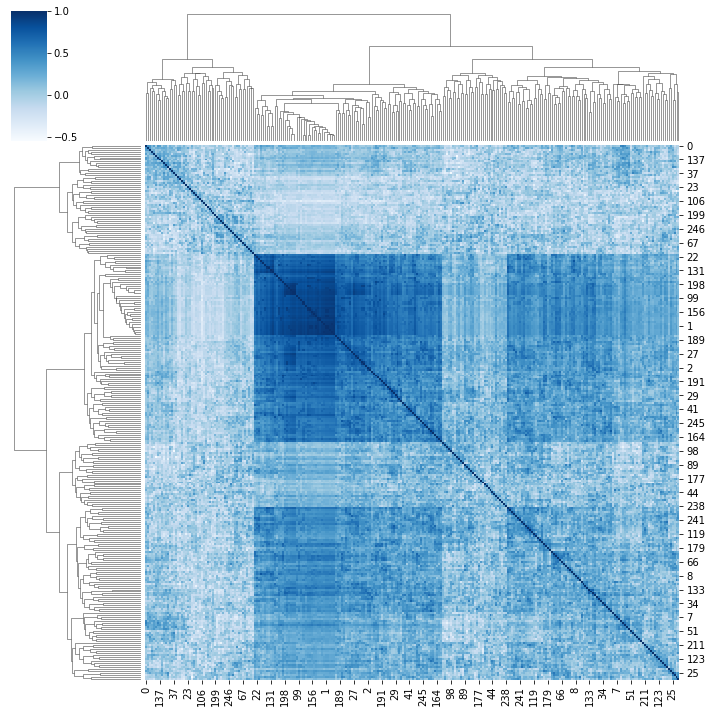

In [201]:
plt.figure(dpi=300,figsize=(15,15))
sns.clustermap(pd.DataFrame(vetor).T.corr(method='spearman'),cmap='Blues')

Text(0, 0.5, 'f(Correlação)')

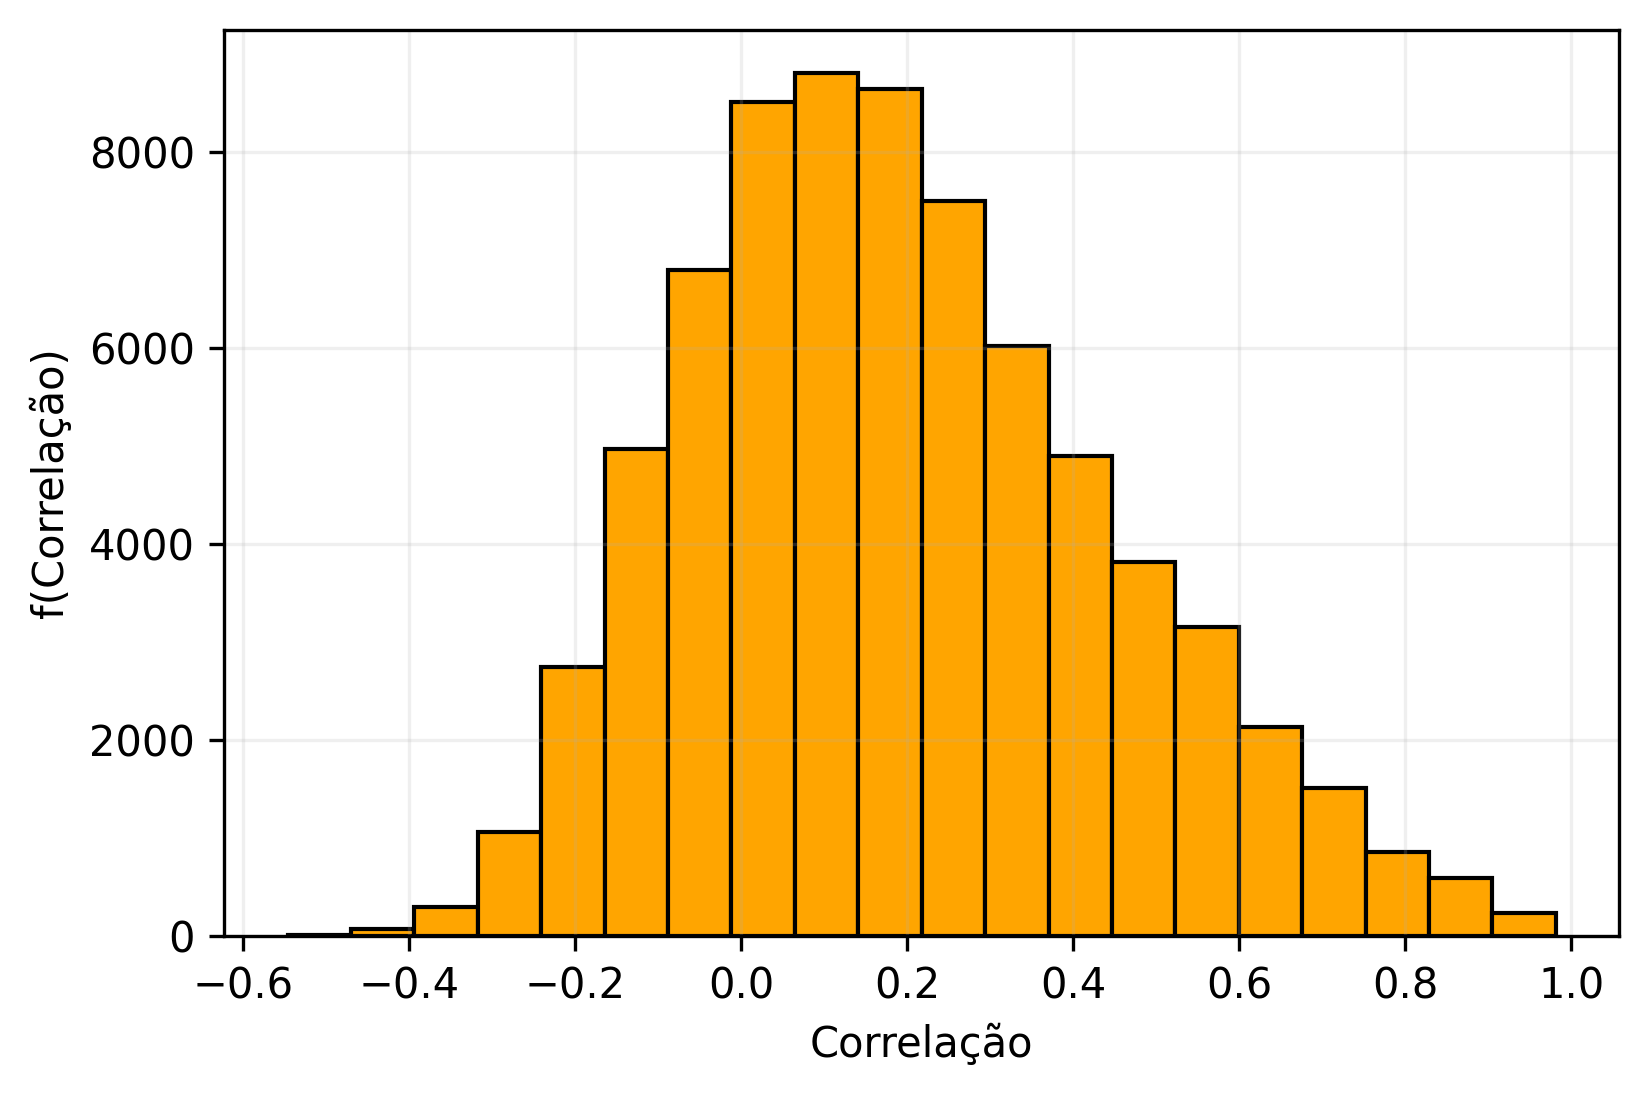

In [199]:

plt.figure(dpi=300)
aux=pd.DataFrame(vetor).T.corr(method='spearman').values.flatten()
plt.hist(aux[aux<1],edgecolor='black',color='orange',bins=20)
plt.grid(alpha=0.2)
plt.xlabel('Correlação')
plt.ylabel('f(Correlação)')

In [198]:
pd.DataFrame(vetor)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1.000000,0.584217,0.412292,0.430415,0.456413,0.471206,0.408100,0.581480,0.522865,0.544497,...,0.153333,0.526472,0.454277,-0.035301,0.503594,0.540172,0.409628,0.451850,0.364615,0.489859
1,0.584217,1.000000,0.301490,0.352945,0.534683,0.420832,0.384652,0.582969,0.460586,0.513696,...,0.204244,0.530757,0.458825,0.080432,0.502582,0.520018,0.441026,0.428908,0.380132,0.480214
2,0.412292,0.301490,1.000000,0.325955,0.413251,0.291873,0.383714,0.460986,0.370461,0.413964,...,0.135343,0.362226,0.314508,0.074659,0.304978,0.325106,0.266106,0.220986,0.215706,0.348863
3,0.430415,0.352945,0.325955,1.000000,0.383972,0.402248,0.398719,0.437249,0.346346,0.436842,...,0.162442,0.351853,0.275062,0.011303,0.261647,0.297037,0.307785,0.365500,0.189464,0.303804
4,0.456413,0.534683,0.413251,0.383972,1.000000,0.464998,0.536055,0.609544,0.424811,0.474671,...,0.196001,0.470576,0.374199,0.065278,0.396130,0.426735,0.390646,0.422369,0.328165,0.397157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.540172,0.520018,0.325106,0.297037,0.426735,0.394180,0.364404,0.548141,0.510998,0.501140,...,0.173882,0.477783,0.348034,0.065122,0.503041,1.000000,0.415051,0.450193,0.318671,0.508071
60,0.409628,0.441026,0.266106,0.307785,0.390646,0.347789,0.306235,0.480619,0.423690,0.437971,...,0.205475,0.415689,0.341356,-0.023820,0.476082,0.415051,1.000000,0.337962,0.172520,0.416954
61,0.451850,0.428908,0.220986,0.365500,0.422369,0.356061,0.449175,0.522912,0.401806,0.377390,...,0.178515,0.450094,0.261399,0.073376,0.433621,0.450193,0.337962,1.000000,0.276788,0.370835
62,0.364615,0.380132,0.215706,0.189464,0.328165,0.261772,0.337248,0.331851,0.288504,0.262972,...,0.137528,0.372103,0.202611,0.060040,0.329461,0.318671,0.172520,0.276788,1.000000,0.226365


# Texto

In [202]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import string 
import spacy 
from spacy.lang.pt.stop_words import STOP_WORDS

from tqdm import tqdm 

In [203]:
pln=spacy.load('pt_core_news_sm')
stop_words=STOP_WORDS
pontuacoes=string.punctuation
pontuacoes=pontuacoes+"..."+" "

In [229]:
stop_words.add('e')

In [230]:
def processamento(texto):
    # texto em minuscula
    texto=texto.lower()
    documento=pln(texto)
    
    #removendo stop words
    lista_tokens_1=[]
    for p in documento:
        if (p.text in stop_words)==False:
            lista_tokens_1.append(p)
    #removendo pontuações      
    lista_tokens_2=[]
    for p in lista_tokens_1:
        if (p.text in pontuacoes)==False:
            lista_tokens_2.append(p.text)
    #lematização de tokens        
#     lista_tokens_3=[]
#     for p in lista_tokens_2:
#         lista_tokens_3.append(p.lemma_)

    return lista_tokens_2

In [231]:
listatextos=[]

for c in tqdm(listacnais):
    texto=' '
    for t in df[df['CNAE FISCAL PRINCIPAL']==c]['NOME FANTASIA'].values:
        texto=texto+' '+t
    listatextos.append(processamento(texto))
    

100%|██████████| 64/64 [00:04<00:00, 14.19it/s]


In [238]:
empreendimento=[]
for i in range(len(listacnais)):
    n1=pd.Series(listatextos[i]).value_counts().index[0]
    n2=pd.Series(listatextos[i]).value_counts().index[1]
    n3=pd.Series(listatextos[i]).value_counts().index[2]
    nome=n1+' '+n2+' '+n3
    empreendimento.append(nome)

In [239]:
pd.Series(empreendimento).value_counts()

tecnologia consultoria servicos      1
engenharia consultoria servicos      1
panificadora pao salgados            1
estetica clinica studio              1
motos moto pecas                     1
                                    ..
consultoria treinamentos servicos    1
mercadinho comercial mercearia       1
marmitaria pizzaria delivery         1
arquitetura estudio projetos         1
marketing digital comunicacao        1
Length: 64, dtype: int64

In [243]:
cnai=pd.DataFrame({'CNAE FISCAL PRINCIPAL':listacnais,'TIPO':empreendimento})
cnai

,CNAE FISCAL PRINCIPAL,TIPO
0,6209100,tecnologia consultoria servicos
1,7112000,engenharia consultoria servicos
2,4789099,embalagens festas casa
3,9430800,instituto associacao escolar
4,5611201,restaurante pizzaria pizza
...,...,...
59,8650003,psicologia clinica saude
60,8650004,clinica fisioterapia fisio
61,4729699,acai suplementos alimentos
62,4754701,moveis comercio casa


## Teste

In [250]:
zonaescolha=np.random.randint(0,len(dfcnai))

x=dfcnai.iloc[zonaescolha].values
x=dfcnai.iloc[zonaescolha].values
media=dfcnai.mean().values
std=dfcnai.std()
resultado=(x-media)/std
daux=pd.DataFrame(resultado).reset_index().rename(columns={'index':'CNAE FISCAL PRINCIPAL',0:'Z'})

daux=pd.merge(daux,cnai,on='CNAE FISCAL PRINCIPAL',how='left').sort_values('Z').reset_index(drop=True)
daux

,CNAE FISCAL PRINCIPAL,Z,TIPO
0,4712100,-0.891167,mercadinho comercial mercearia
1,9313100,-0.654786,academia fitness pilates
2,9491000,-0.616187,igreja deus comunidade
3,1412601,-0.608783,confeccoes moda jeans
4,4744099,-0.603706,construcao construcoes deposito
...,...,...,...
59,8211300,-0.271856,servicos consultoria coworking
60,7111100,-0.259457,arquitetura estudio projetos
61,6810201,-0.254219,empreendimentos imoveis imobiliarios
62,8291100,-0.252045,solucoes assessoria promotora


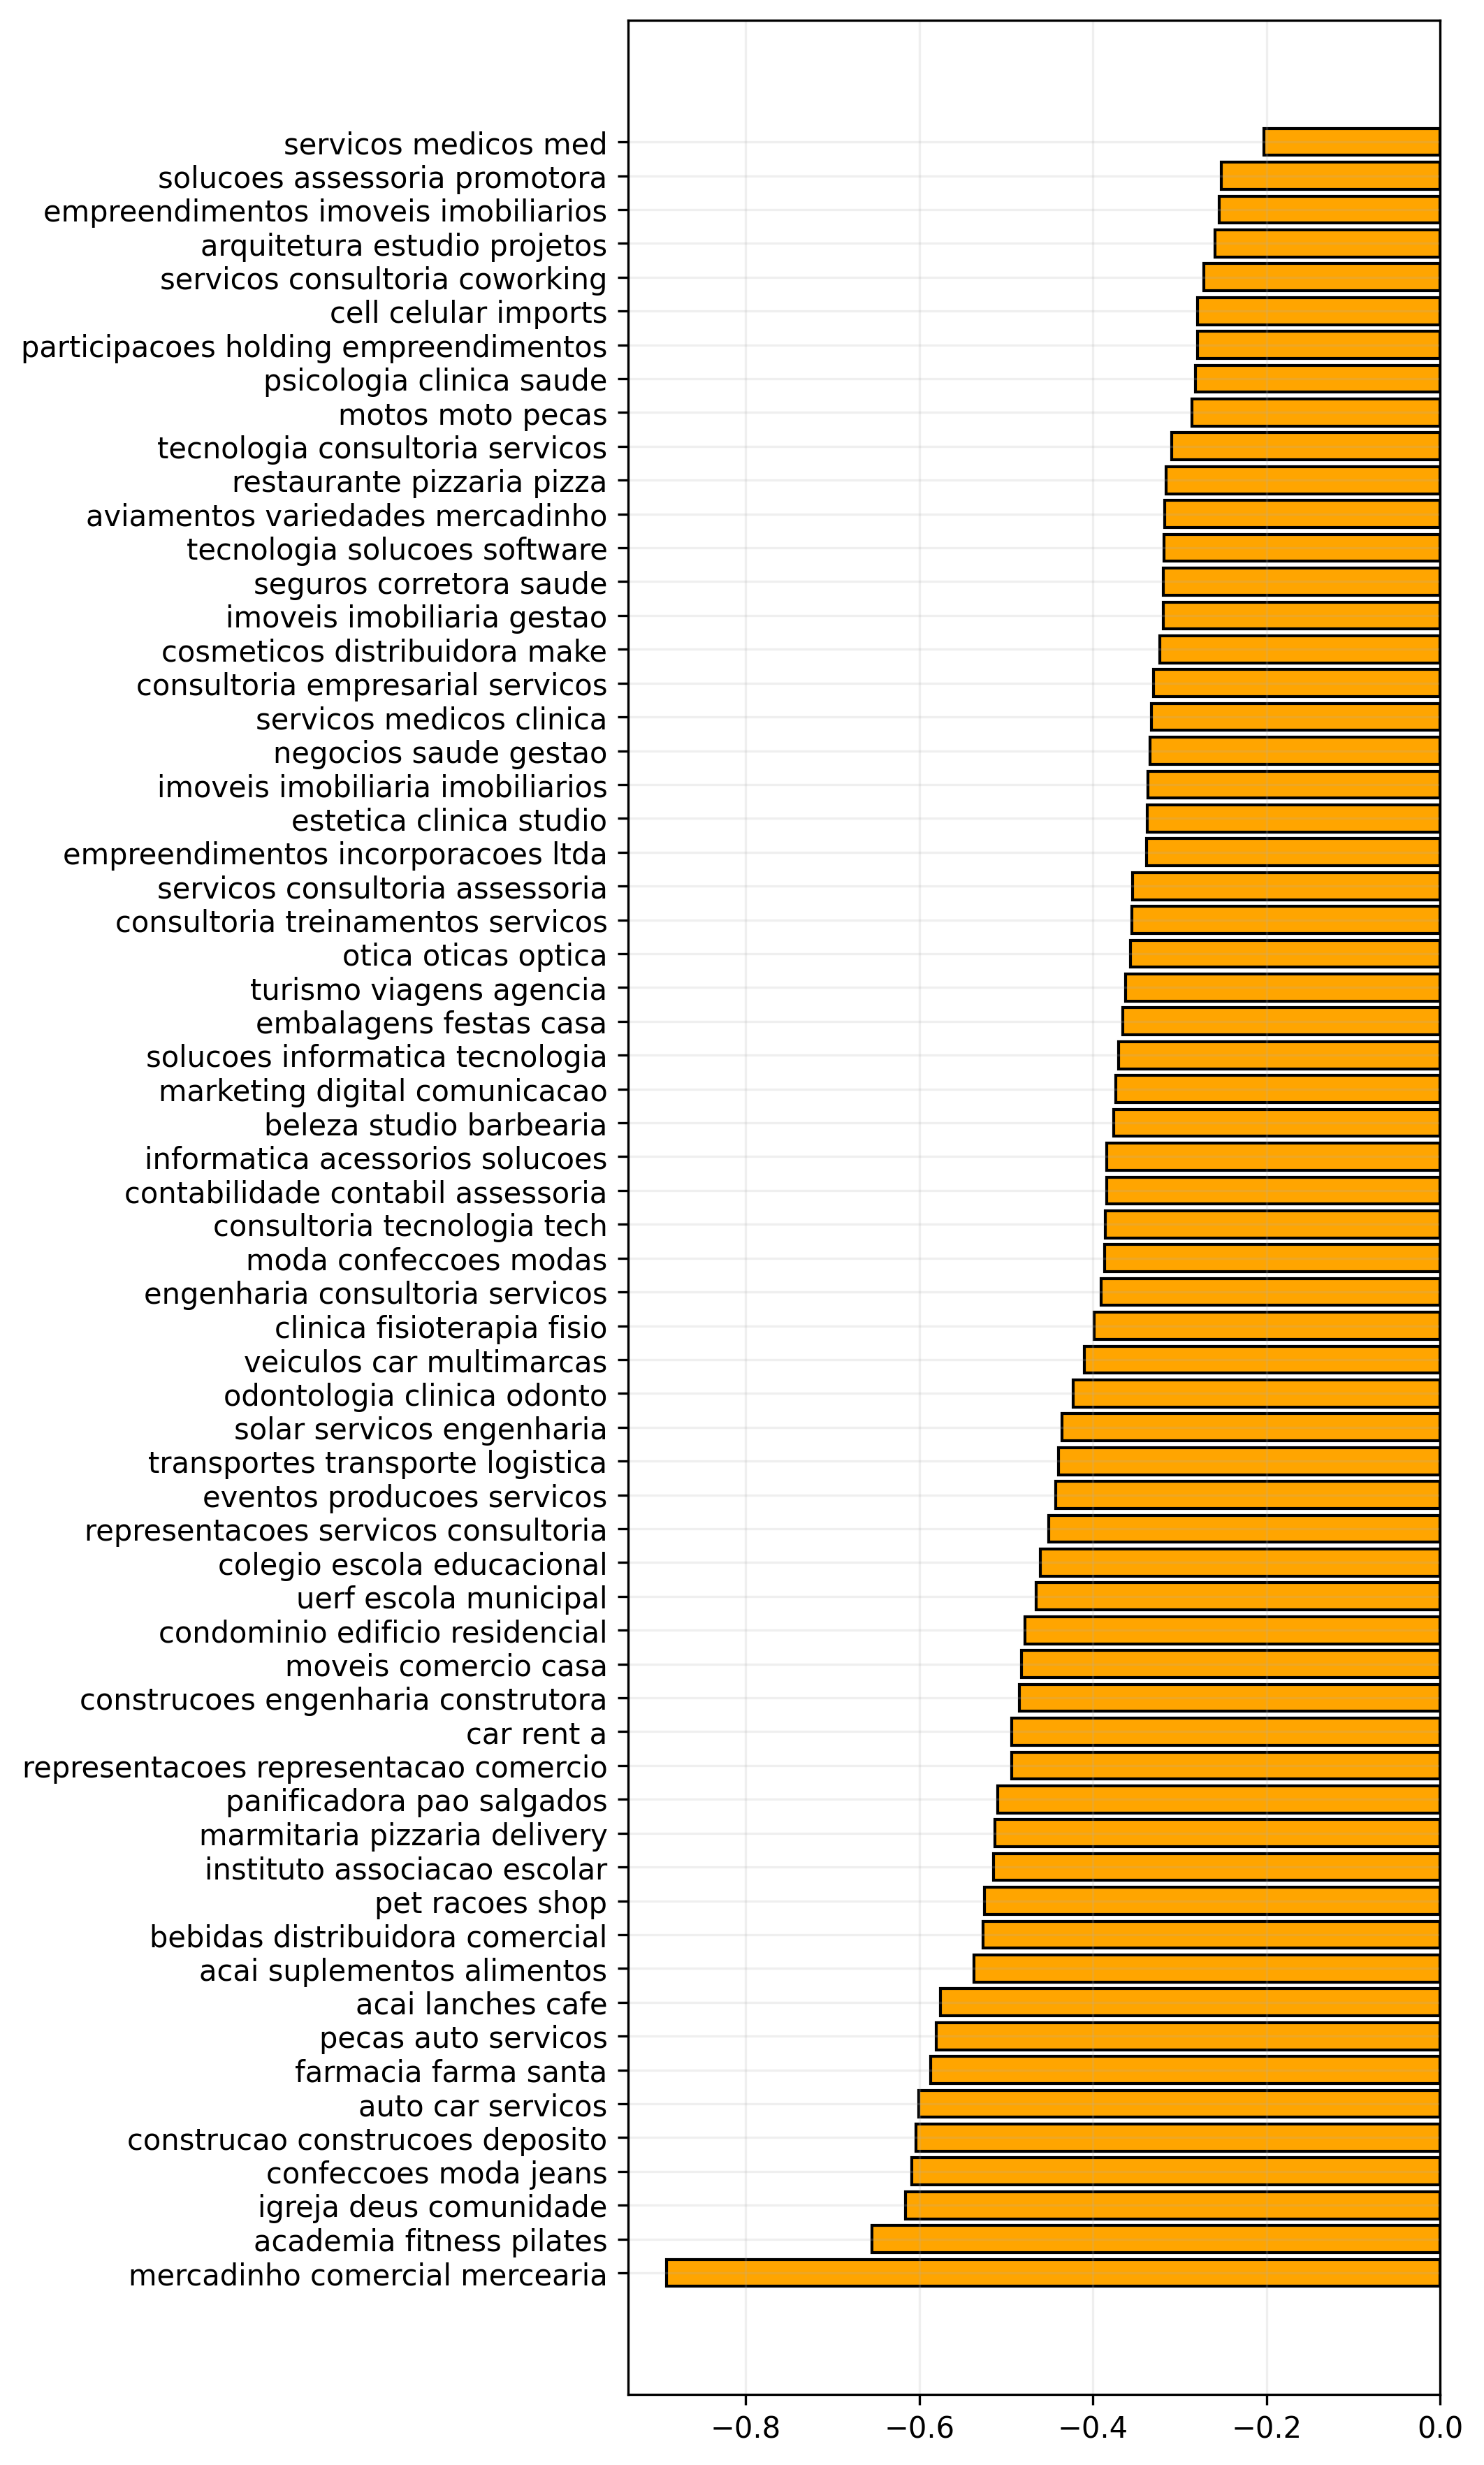

In [252]:
plt.figure(dpi=300,figsize=(5,15))

plt.barh(daux['TIPO'],daux.Z.values,edgecolor='black',color='orange')
plt.xticks(rotation=0)
plt.grid(alpha=0.2)

Text(0.5, 1.0, 'Fortaleza')

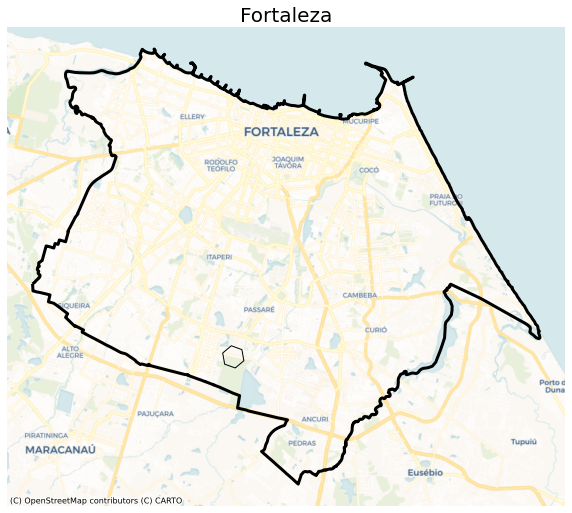

In [253]:
fig, ax = plt.subplots(figsize=(10,15))

Fortaleza_hexagons[zonaescolha:zonaescolha+1].to_crs("EPSG:3857").plot(ax=ax, facecolor='none', edgecolor="k", lw=1)
#contorno
Fortaleza_polygon.to_crs("EPSG:3857").plot(ax=ax, facecolor="none", edgecolor="k", lw=3)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title("Fortaleza", fontsize=20)